In [1]:
import numpy as np
from matplotlib import pyplot as plt
from glob import glob

plt.rcParams["figure.dpi"] = 100

## Exercise 5 {-}

Let $f \in C[0,1]$ and $k \in C^1[0,1]$. Consider the BVP
$$
-(ku^\prime)^\prime = f
$$
with boundary condition
$$
u(0) = u(1) = 0\,.
$$

### (a & b) {-}

For $k\equiv 1$ and $f \equiv 1$, the BVP reduces to $-u^{\prime \prime} = 1$ and integrating twice gives the solution $u(x) = -\frac{1}{2}x^2 + cx + b$. Due to the boundary condition we must have $c=1$ and $b=0$, i.e., $u(x) = \frac{x(1 - x)}{2}$.

In [2]:
def u(x):
    return 0.5*x*(1-x)

The finite element code was implemented in C++ and the result was written into files that are read below.

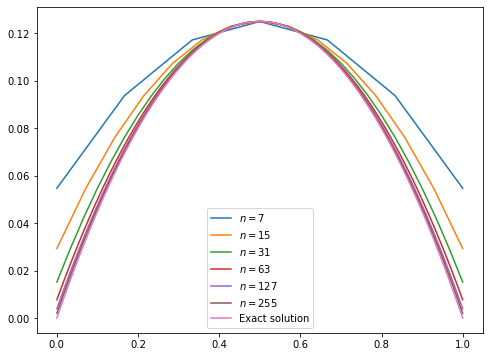

In [3]:
fnames = glob("./res_a_*")

fe_res_a = dict()
for file in fnames:
    n = int(file[8:-4])
    fe_res_a[n] = np.loadtxt(file)
    

fig = plt.figure(figsize=(8,6))

for key, value in sorted(fe_res_a.items()):
    plt.plot(np.linspace(0,1,len(value)), value, label=f"$n = {key}$")

ts = np.linspace(0,1,1000)    
plt.plot(ts, u(ts), label="Exact solution")
plt.legend()
plt.show()

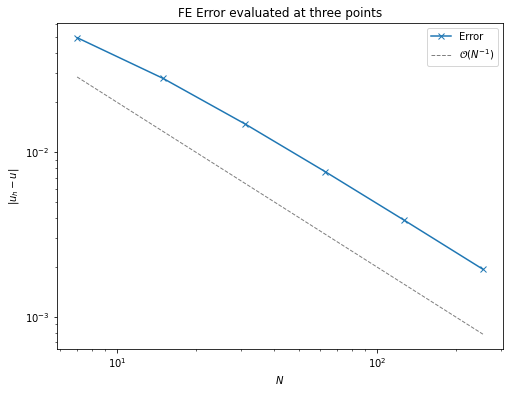

In [4]:
errors = np.empty([len(fe_res_a)])

for i, (key, value) in enumerate(sorted(fe_res_a.items())):
    err =  abs(u(0) - value[0])
    err += abs(u(1) - value[1])
    err += abs(u(0.5) - value[len(value) // 2])
    
    errors[i] = err / 3
    
plt.figure(figsize=(8,6))
Ns = sorted(list(fe_res_a.keys()))
plt.loglog(Ns, errors, 'x-', label="Error")
# Plot convergence rate
x0 = Ns[0]
x1 = Ns[-1]
y = lambda x : 0.2*x**-1
y0 = y(x0)
y1 = y(x1)    
plt.loglog([x0,x1], [y0,y1], '--', color='gray', linewidth=1, label=f"$\mathcal{{O}}(N^{{-1}})$")
plt.legend()
plt.title("FE Error evaluated at three points")
plt.ylabel("$|u_h - u|$")
plt.xlabel("$N$")
plt.show();

### (c) {-}

The exact solution is (according to WolframAlpha) given by:

In [5]:
def u2(x):
    return -1/15*x*(5*x*x + 11*x - 16)

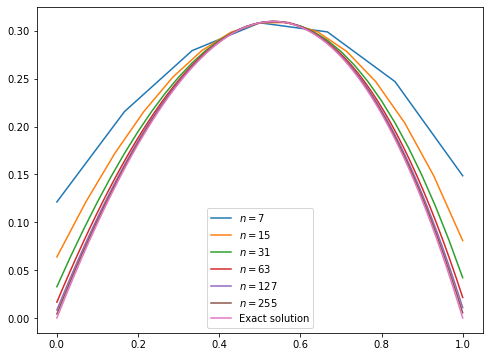

In [6]:
fnames = glob("./res_c_*")

fe_res_c = dict()
for file in fnames:
    n = int(file[8:-4])
    fe_res_c[n] = np.loadtxt(file)
    

fig = plt.figure(figsize=(8,6))

for key, value in sorted(fe_res_c.items()):
    plt.plot(np.linspace(0,1,len(value)), value, label=f"$n = {key}$")

ts = np.linspace(0,1,1000)    
plt.plot(ts, u2(ts), label="Exact solution")
plt.legend()
plt.show()

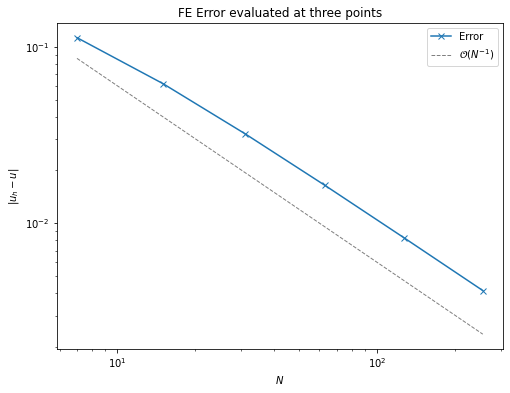

In [8]:
errors = np.empty([len(fe_res_c)])

for i, (key, value) in enumerate(sorted(fe_res_c.items())):
    err =  abs(u2(0) - value[0])
    err += abs(u2(1) - value[1])
    err += abs(u2(0.5) - value[len(value) // 2])
    
    errors[i] = err / 3
    
plt.figure(figsize=(8,6))
Ns = sorted(list(fe_res_c.keys()))
plt.loglog(Ns, errors, 'x-', label="Error")
# Plot convergence rate
x0 = Ns[0]
x1 = Ns[-1]
y = lambda x : 0.6*x**-1
y0 = y(x0)
y1 = y(x1)    
plt.loglog([x0,x1], [y0,y1], '--', color='gray', linewidth=1, label=f"$\mathcal{{O}}(N^{{-1}})$")
plt.legend()
plt.title("FE Error evaluated at three points")
plt.ylabel("$|u_h - u|$")
plt.xlabel("$N$")
plt.show();